Load the `tidyverse`. 📊

In [4]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Run the following cell to get the CDC vaccination data. 

In [5]:
vax_data = read_csv(
    "covid19_vaccinations_in_the_united_states.csv", 
    na = 'N/A',
    col_types = cols()
)

What columns are in the data set? 


(**Hint:** for wide tables like this it can be useful to just print the column names using the `colnames` function—can you figure out how to use `colnames` from its documentation?)

In [6]:
vax_data |> head()

State/Territory/Federal Entity,Total Doses Delivered,Doses Delivered per 100K,18+ Doses Delivered per 100K,Total Doses Administered by State where Administered,Doses Administered per 100k by State where Administered,18+ Doses Administered by State where Administered,18+ Doses Administered per 100K by State where Administered,People with at least One Dose by State of Residence,Percent of Total Pop with at least One Dose by State of Residence,⋯,Percent of 12+ Pop with at least One Dose by State of Residence,People 12+ Fully Vaccinated by State of Residence,Percent of 12+ Pop Fully Vaccinated by State of Residence,People 12+ Fully Vaccinated_Moderna_Resident,People 12+ Fully Vaccinated_Pfizer_Resident,People 12+ Fully Vaccinated_Janssen_Resident,People 12+ Fully Vaccinated_Unknown 2-dose Manuf_Resident,12+ Doses Administered by State where Administered,Doses Administered per 100k of 12+ pop by State where Administered,Doses Delivered per 100k of 12+ pop
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alaska,1006435,137577,182470,759522,103824,705705,127947,410256,56.1,⋯,67.2,354298,58.2,138449,185287,30503,59,757374,124389,165294
Alabama,6485880,132279,170015,4342220,88559,4126631,108172,2520979,51.4,⋯,60.2,1987970,47.5,852202,997587,137829,352,4341829,103701,154910
Arkansas,3887730,128826,167745,2923649,96880,2727211,117671,1650867,54.7,⋯,64.4,1326105,51.9,570764,660695,93967,679,2918437,114124,152028
American Samoa,62040,111404,143032,58461,104978,49693,114566,32389,58.2,⋯,68.1,26661,56.1,6488,19619,554,0,58446,122897,130454
Arizona,9655990,132661,171252,8012829,110086,7477417,132614,4238085,58.2,⋯,68.3,3631898,58.5,1425876,1928801,273494,3727,8011780,129096,155590
Bureau of Prisons,232500,NA,NA,222445,NA,222443,NA,119685,NA,⋯,0.0,113374,0.0,43313,58947,11114,0,222443,0,0


Make a histogram (with a rug) of 18+ at-least-one-dose vaccination rates (percent) for all states. **When you're working with a column name that has spaces, you need to wrap it in back ticks \`\`.**

Like this:

```R
aes(x = `some column name with spaces`)
```

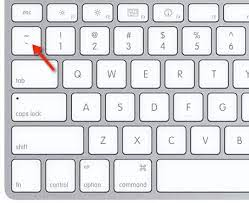

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”


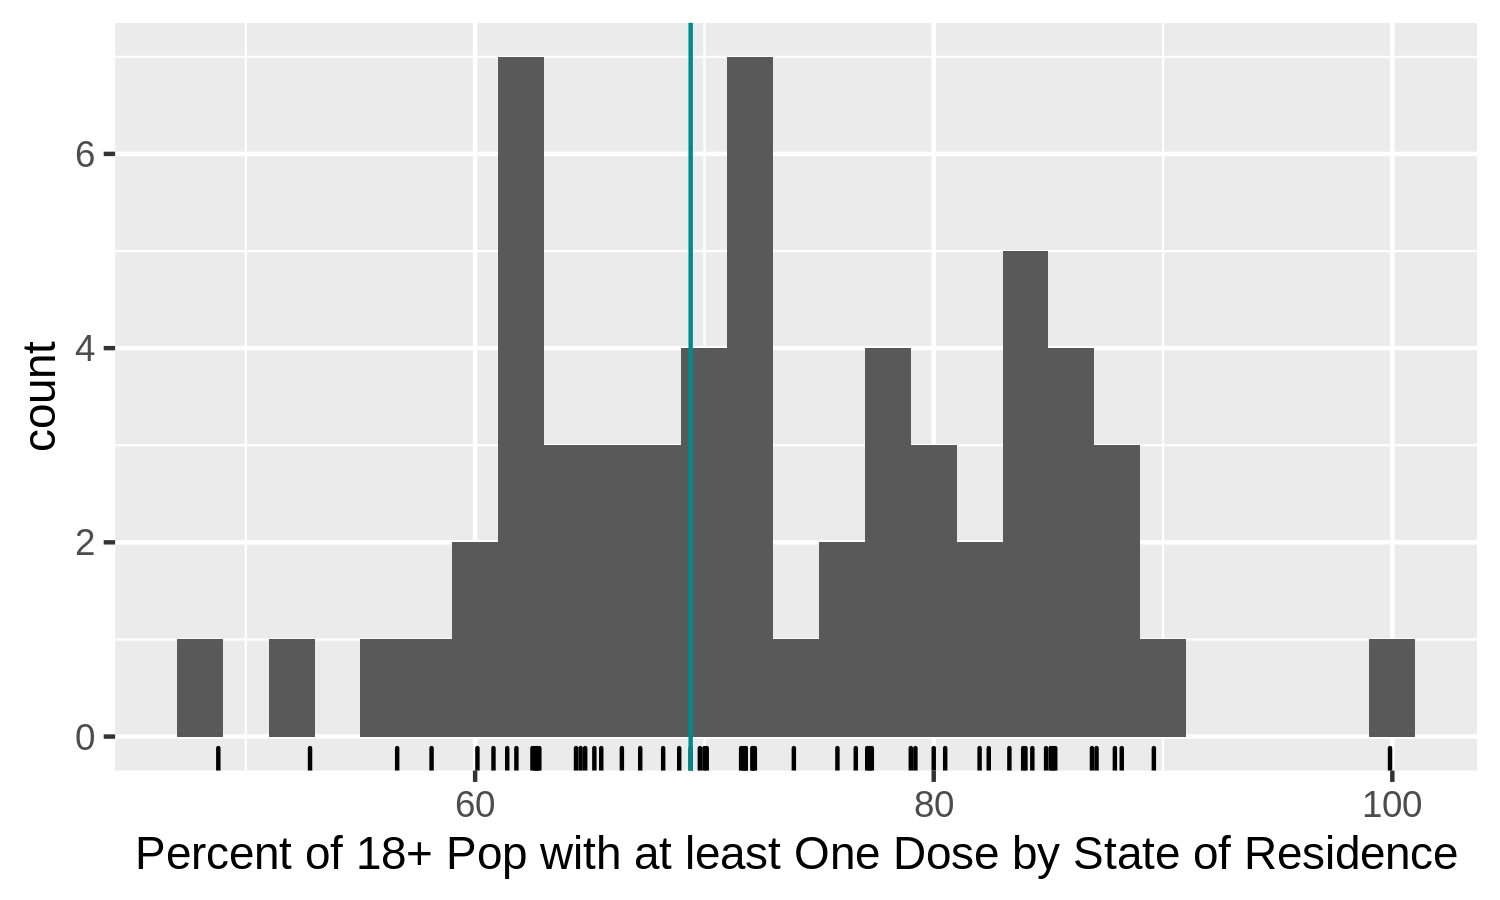

In [17]:
options(repr.plot.height = 3, repr.plot.width = 5)

p = ggplot(vax_data, 
           aes(x = `Percent of 18+ Pop with at least One Dose by State of Residence`)) + 
    geom_histogram(binwidth = 2) + 
    geom_rug() + geom_vline(xintercept = 69.4, color = 'darkcyan')

p

The code below will pull out the vaccination rate for North Carolina.

In [12]:
vax_data %>%
    filter(`State/Territory/Federal Entity` == "North Carolina") %>%
    pull(`Percent of 18+ Pop with at least One Dose by State of Residence`) %>%
    paste("of 18 or older North Carolinians have at least 1 dose")

[1] "69.4 of 18 or older North Carolinians have at least 1 dose"

Can you use `geom_vline` to add a vertical line representing the position of NC's vaccination rate to your histogram? What arguments does `geom_vline` take?

geom_vline: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

🛑 **Stop here** 🛑

Use `percent_format` function from the `scales` and `scale_x_continuous` package to update the `x-axis` labels to percent formatting.

Make the same chart with a different theme (E.g. try `theme_minimal`).